### Practicing the EDA by using the titanic semi cleaned data set from kaggle given by krish sir in Youtube EDA lecture


## Importing all the libraries

In [1]:
import pandas as pd #[to do some operations in any kind of the files]
import numpy as np #[used to do some operations in Arrays, and also some of the maths functions]
import seaborn as sns #[used to data visualization]
import matplotlib.pyplot as plt #[used to data visualization]
%matplotlib inline

In [2]:
## The data is Titanic_train.csv
### Lets read the dataset by using the pandas
train = pd.read_csv('D:\\Data Science\\iNeuron\\ML\\EDA&FE\\Datasets\\titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
### Let's begin with EDA! we'ss start by checking the missing data!

### Missing Data
#### We can use seaborn to create simple heatmap to see where we are missing data!

In [3]:
#to check how many missing values we have
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

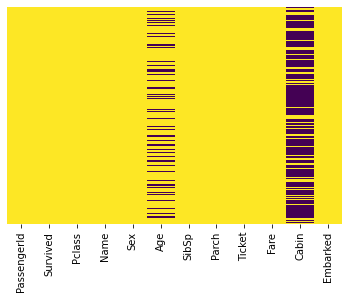

In [5]:
#to get clear idea how many null values are there in the dataset by using the heatmap
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis_r',cbar=False)
#yitcklables is nothing but to get the y columns values inthe graph if its false then it won'd display in the graph
#cmap is nothing but color of the graph
#cbar is nothing but one bar will be displayed by default along with the graph

Roughly 20 percent of the age data is missing. The proportion of age missing is likely small enough for reasonable 
replacement with some from of imputation locking at the cabin column. it looks like we are just missing of that data 
to do something usefull with at a basic level. We'll probably drop this lated or change it to another feature like 'cabin known',1 or o

Lets continue on by visualizing some more of the data check out the video for ful explanations over these plots.this code is just to serve as reference

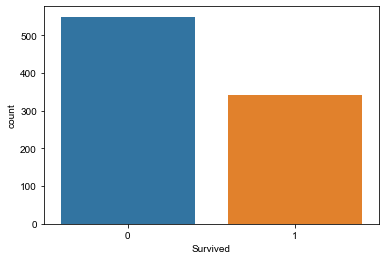

In [6]:
sns.countplot(x='Survived',data = train)
sns.set_style('whitegrid') # just graph design

<AxesSubplot:xlabel='Survived', ylabel='count'>

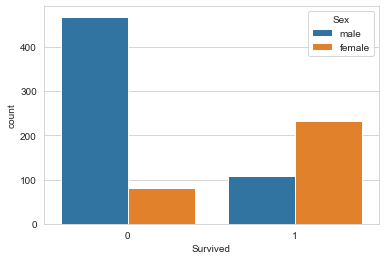

In [7]:
#from the above map just let's split data as male and female
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

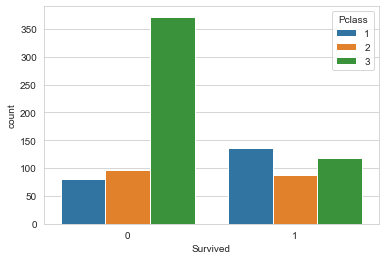

In [8]:
#do some more analysis based on the above graph
#get the data based on the Passanger class(Pclass) hoe much people are survived and not survived
sns.countplot(x='Survived',hue='Pclass',data = train)

C:\Users\subas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

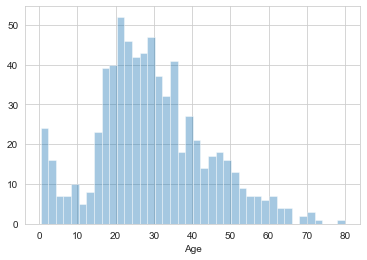

In [9]:
#lets try to get the data as in which age people have traveling in the shipe by using the distribution plot
sns.distplot(train['Age'].dropna(),kde=False,bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

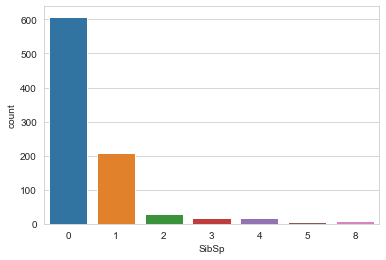

In [10]:
#count plot of siblings and spouse
sns.countplot(x='SibSp',data=train)

who had zero sib and spouse
who had one sib and spouse
who had 2 sib and spouse
who had 3 sib and spouse
who had 4 sib and spouse
who had 5 sib and spouse
who had 6 sib and spouse
who had 7 sib and spouse
who had 8 sib and spouse
###from the above graph we can decide most of the people don't have sib ans spouse which is more than 600 people

<AxesSubplot:>

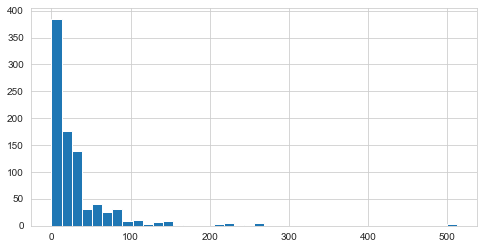

In [11]:
#plot the histogram for the Fare column
train['Fare'].hist(bins=40,figsize=(8,4))

## Data Cleaning

we want to fill the missing age data instrad of just dropping the missinge age data rows. one way to do this is by filling in the mean age of all the passanges
(imputations).However we can be smatter about this and check the average age by passanger class. For example

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

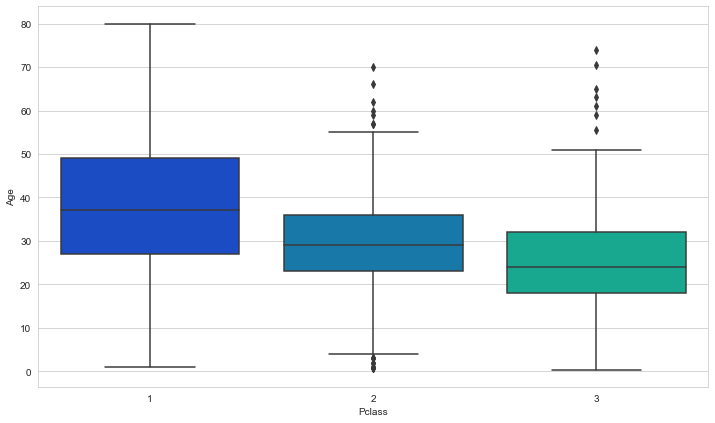

In [13]:
#plot the box plot and get the rough average of the all PClass and define one function to fill out the null values inth data set
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter') 
#palette =Colors to use for the different levels of the ``hue`` variable. Should be something that can be interpreted by :func:`color_palette`, or adictionary mapping hue levels to matplotlib colors.    

So based on the above graph we can coclude the average age of the all 3 bussiness class
P1 class passangers age avaerage is around 37
P2 class passangers age average is around 29
P3 class passangers age average is around 34

In [19]:
#define a function to replace the null values in age column by average age of based on Pclass
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 27
    else:
        return Age

Now apply the function in the dataset

In [20]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

Now lets check that heat map again!

<AxesSubplot:>

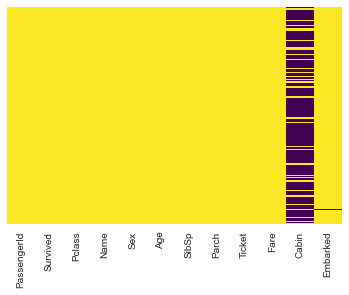

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis_r',cbar=False)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now successfully replaced with average age values instead of NAN values based on the Pclass average age

Next we have to handle the cabin column missing values
But in this particular column we have so many nan values so if we want to replace it then we need feature engennring comes into this picture so we can drop this particular column here and also drop the Embarked row where we have nan values of cabin

In [23]:
train.drop('Cabin',axis=1,inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Encoding the data for categarical data columns in the data set


We'll need to convert the categorical features to dummy variables using pandas otherwise our machine learning algorithm won't
be able to directly take in those features as inputs

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [38]:
#encodung the embarked column
pd.get_dummies(train['Embarked'],drop_first=True).head() #here we dropped one of the embarked feature from the data. the reason behind is if we create three dummies obiously the values will be 001 or 110 or 010 or 001 so anyway we will get smiliar feature as 2 column so we can drop any one of those

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [40]:
#encoding the gender column
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [42]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [43]:
#drop the all old cat columns 
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True) #axis 1 means its indicate the column values if its 0 then its indicate the rows

In [44]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [45]:
train = pd.concat([train,sex,embarked],axis=1)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great our data is ready!

In [ ]:
Feature Engineering:
Step1:
    EDA
    1.Numerical or how many categorical featureis there
    2.Missing values(Visualization all the graph)
    3.outliers(Box plot)
    4.Cleaning the data
    so this above proccess is doing the work make our raw data to usefull data
Step2:
    1. Start handling the missing values(Mean,Median,Mode,etc)
Step3:
    1. Handling imbalance dataset
Step4:
    1.Treating the outliers
Step5:
    1. Scaling the data(Standardization,Normalization)
Step6: 
    1. Encoding the data(categorical to numerical data)
Feature Selection:
    Out of 1000 feature if we have then we don't want this much of feature so here we can select the required features only by using the below stpes
    1. Correlation
    2.K Neighbours
    3. Chi square
    4. genetics algorithm
    5. Feature importance